In [17]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

Calculate from two subsequent images the transition matrix/matrices.

In [23]:
path = './output/'
files = [f for f in listdir(path) if isfile(join(path, f))]

image1 = xr.open_dataset(path + files[0])
image2 = xr.open_dataset(path + files[1])
image1

<xarray.Dataset>
Dimensions:  (x: 535, y: 430)
Coordinates:
  * x        (x) float64 0.0 0.001873 0.003745 0.005618 ... 0.9963 0.9981 1.0
  * y        (y) float64 0.0 0.002331 0.004662 0.006993 ... 0.9953 0.9977 1.0
    time     datetime64[ns] ...
Data variables:
    cod      (x, y) float32 ...
    dqf_cod  (x, y) float32 ...
    cth      (x, y) float32 ...
    ct       (x, y) int32 ...
Attributes:
    extent:   [-50. -30.  -5.  15.]

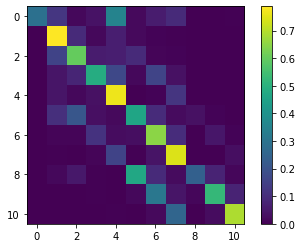

to,0,1,2,3,4,5,6,7,8,9,10
from,,,,,,,,,,,
0,154,66,9,20,185,10,31,49,0,0,3
1,54,30698,3627,682,2635,753,260,239,7,13,2
2,17,2859,10890,1089,1185,1708,211,143,26,7,3
3,27,661,1207,7311,2565,255,2402,532,2,41,2
4,193,3007,1113,2409,50339,148,475,7872,3,5,26
5,16,772,1531,238,152,3377,717,177,248,55,16
6,22,214,260,2652,608,691,14987,2302,39,1108,177
7,48,292,128,561,8317,181,2229,39391,6,118,1524
8,0,8,23,2,1,215,43,11,109,36,6


In [56]:
# check
if np.abs(image1.time - image2.time) > np.timedelta64(15, 'm'):
    print('images are not subsequent')
    

M = pd.crosstab(image1.ct.data.flatten(), image2.ct.data.flatten(),
                rownames = ['from'],
                colnames = ['to'],
#                 normalize = 'index'
               )


M_norm = M.div(M.sum(axis=1), axis=0)

plt.imshow(M_norm)
plt.colorbar()
plt.show()
M
